# E-commerce Project by Kunal Kaudan

## Objective : To answer the following questions based on the ecommerce data.
### Q What was the best month for Sales? How much was earned?
### Q Which city has the highest number of sales? Two cities in the data goes by the same name in two different states. Find that city along with states and then calculate the city wise revenues accordingly.
### Q Which time of the day should the advertisement be displayed in order to attain the maximum likelihood of customers buying the products?
### Q Which products were most often sold together?
### Q What are the products currently company is selling? Analyse the prices of expensive to cheapest product.
### Q Are the price of the particular products same across every city? Analyse it using table and visualize the data also.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style(style='whitegrid')

In [2]:
# Changing directory
os.chdir("C:/Users/Kunal/Jupyter files/Rishab_project/20. Project 1/Ecommerce Data - 12 Months")

# Importing Data

In [3]:
data = pd.DataFrame()
files = os.listdir() # passes the list of all the files in the set directory
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
# Creating a for loop to read files one by one and concatenate them to data variable
for file in files:
    df = pd.read_csv(file)
    data = pd.concat([data,df])

In [5]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


(186850, 6)

In [7]:
# checking for missing values in the data
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
# Dropping missing values
data.dropna(inplace=True)

In [9]:
# Resetting index
data.reset_index(drop=True, inplace=True)

In [10]:
# Trying to find the rows with str values in them
mask=data[data["Order ID"]=="Order ID"]
mask.index # gives the index for the above data

Int64Index([   517,   1146,   1152,   2869,   2884,   3026,   3198,   3607,
              4127,   4632,
            ...
            183277, 183953, 184129, 184242, 184578, 184624, 185009, 186019,
            186088, 186194],
           dtype='int64', length=355)

In [11]:
# dropping index (rows) stored above
data.drop(mask.index, inplace=True)

data.reset_index(inplace=True,drop=True)


## Q1) What was the best month for Sales? How much was earned?

In [12]:
# Converting date column to DateTimeIndex
data["Order Date"] =pd.to_datetime(data["Order Date"])


In [13]:
# Extracting Month Name 
data["Month Name"] = pd.DatetimeIndex(data["Order Date"]).month_name() 

In [14]:
# checking for unique values in months column
data["Month Name"].unique()


array(['April', 'May', 'August', 'September', 'December', 'January',
       'February', 'March', 'July', 'June', 'November', 'October'],
      dtype=object)

In [15]:
# Calculating Revenue and converting data types in each column
data["Revenue"] = data["Price Each"].astype(float) * data["Quantity Ordered"].astype(int) 
data["Price Each"] = data["Price Each"].astype(float)
data["Quantity Ordered"] = data["Quantity Ordered"].astype(int)
data["Order ID"] = data["Order ID"].astype(int)


In [16]:
# calculating monthly revenues
ans1 = data.groupby(by="Month Name")["Revenue"].sum().round()

In [17]:
type(ans1)


pandas.core.series.Series

In [18]:
ans1=ans1.reset_index()

In [19]:
ans1 = pd.DataFrame(ans1)
ans1

,Month Name,Revenue
0,April,3390670.0
1,August,2244468.0
2,December,4613443.0
3,February,2202022.0
4,January,1822257.0
5,July,2647776.0
6,June,2577802.0
7,March,2807100.0
8,May,3152607.0
9,November,3199603.0


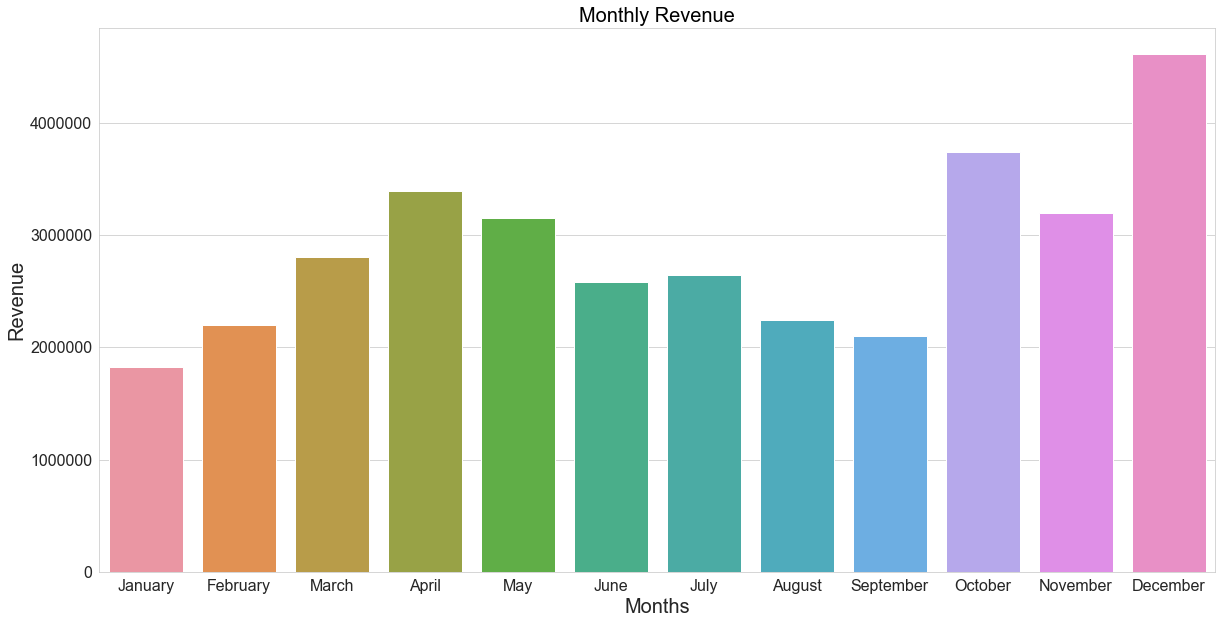

In [20]:
#  plotting on barplot

# setting plot size
plt.figure(figsize=(20,10))

# Barplot: sorting months
sns.barplot(x="Month Name", y="Revenue", data=ans1,
            order=["January","February","March","April","May","June","July",
                   "August","September","October","November","December"])

# Setting barplot title asthetics
plt.title(label="Monthly Revenue", fontsize=20, color="black")

# Setting name and font size for y axis 
plt.ylabel("Revenue", fontsize=20)

# Setting name and font size for y axis
plt.xlabel('Months', fontsize=20)

# Increasing font size of ticks
plt.tick_params(axis = 'both', labelsize=16)

# Removing scientific notation from yaxis
plt.ticklabel_format(style='plain', axis='y')



In [21]:
# Printing in values
max_sales = ans1["Revenue"].max() 
max_month = ans1["Revenue"].idxmax()
max_month = ans1["Month Name"][max_month]
print(f"The best month for sales is {max_month}, with Sales of ${max_sales}")

The best month for sales is December, with Sales of $4613443.0


### Q2) Which city has the highest number of sales? Two cities in the data goes by the same name in two different states. Find that city along with states and then calculate the city wise revenues accordingly.


In [22]:

# Trying to split the values from purchase address
def extract_city_state(a):
    asplit = a.split(",")
    city = asplit[1].strip()
    return city


data["City"] = data["Purchase Address"].apply(extract_city_state)


In [23]:
# Fetching state names
def extract_state_code(x):
    x=x.split(",")[2].strip()
    x=x.split()[0]
    return x

data["State Code"] = data["Purchase Address"].apply(extract_state_code)


In [24]:
# Creating a new City-State column
data["City-State"] = data["City"] + "-" + data["State Code"]


In [25]:
# checking unique cities
data["City-State"].unique()


array(['Dallas-TX', 'Boston-MA', 'Los Angeles-CA', 'San Francisco-CA',
       'Seattle-WA', 'Atlanta-GA', 'New York City-NY', 'Portland-OR',
       'Austin-TX', 'Portland-ME'], dtype=object)

In [26]:
# Calculating city-wise Revenues
city_revenue = data.groupby(by="City-State")["Revenue"].sum().round()

In [27]:
# Converting the Series to DataFrame
city_revenue = pd.DataFrame(city_revenue)

In [28]:
# Resetting index so that city column is available
city_revenue = city_revenue.reset_index()
city_revenue

,City-State,Revenue
0,Atlanta-GA,2795499.0
1,Austin-TX,1819582.0
2,Boston-MA,3661642.0
3,Dallas-TX,2767975.0
4,Los Angeles-CA,5452571.0
5,New York City-NY,4664317.0
6,Portland-ME,449758.0
7,Portland-OR,1870732.0
8,San Francisco-CA,8262204.0
9,Seattle-WA,2747755.0


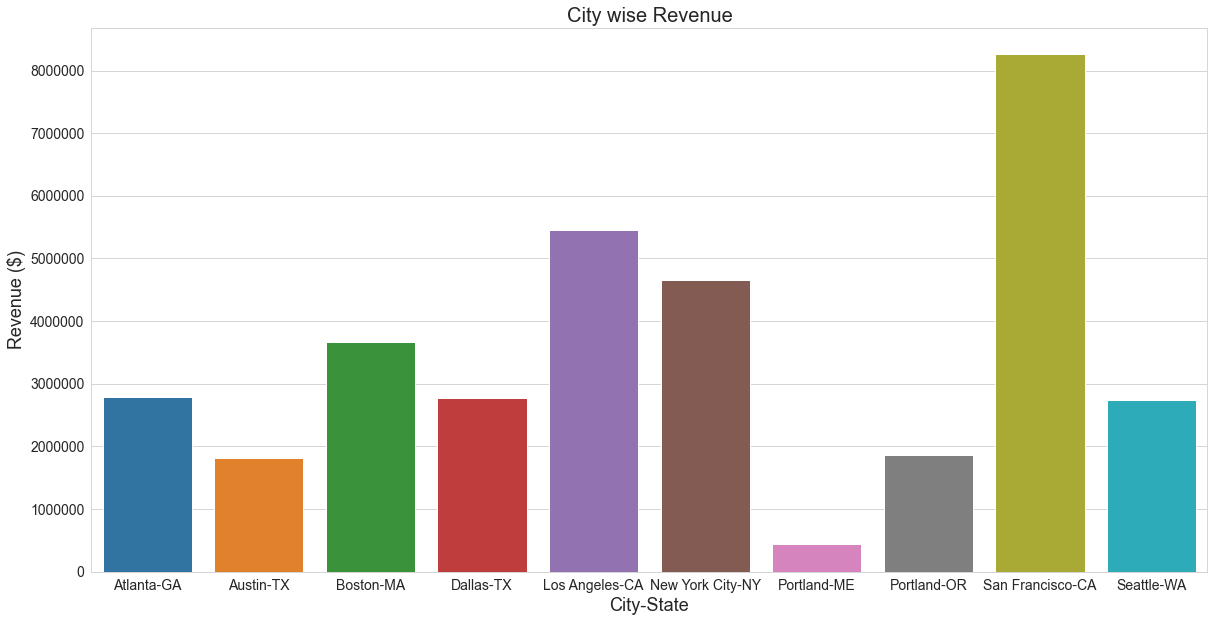

In [29]:
# Barplot to analyse city wise revenues

# Plot Size
plt.figure(figsize=(20,10))

sns.barplot(x="City-State", y="Revenue", data=city_revenue)

# Creating title for the plot
plt.title("City wise Revenue", fontsize=20)

# Creating labels 
plt.xlabel("City-State",fontsize=18)
plt.ylabel("Revenue ($)",fontsize=18)
plt.tick_params(labelsize=14)
plt.ticklabel_format(style='plain', axis='y')

In [30]:
# Calculating city with maximum sales
max_city_sale = city_revenue['Revenue'].max()
max_city_loc = city_revenue['Revenue'].idxmax()
max_city_loc = city_revenue['City-State'][max_city_loc]

print(f"Maximum revenue of ${max_city_sale} was generated from {max_city_loc}")


Maximum revenue of $8262204.0 was generated from San Francisco-CA


### What are the products company is selling? Analyse the prices of expensive to cheapest products.

In [31]:
# grouping products
product_price = data.groupby(by="Product")["Price Each"].unique()

In [32]:
# converting the result to data frame
product_price = pd.DataFrame(product_price)

In [33]:
# reseting index
product_price.reset_index(drop=False, inplace=True)

In [34]:
# Converting price to float
product_price["Price Each"] = product_price["Price Each"].apply(lambda x: float(x))
product_price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


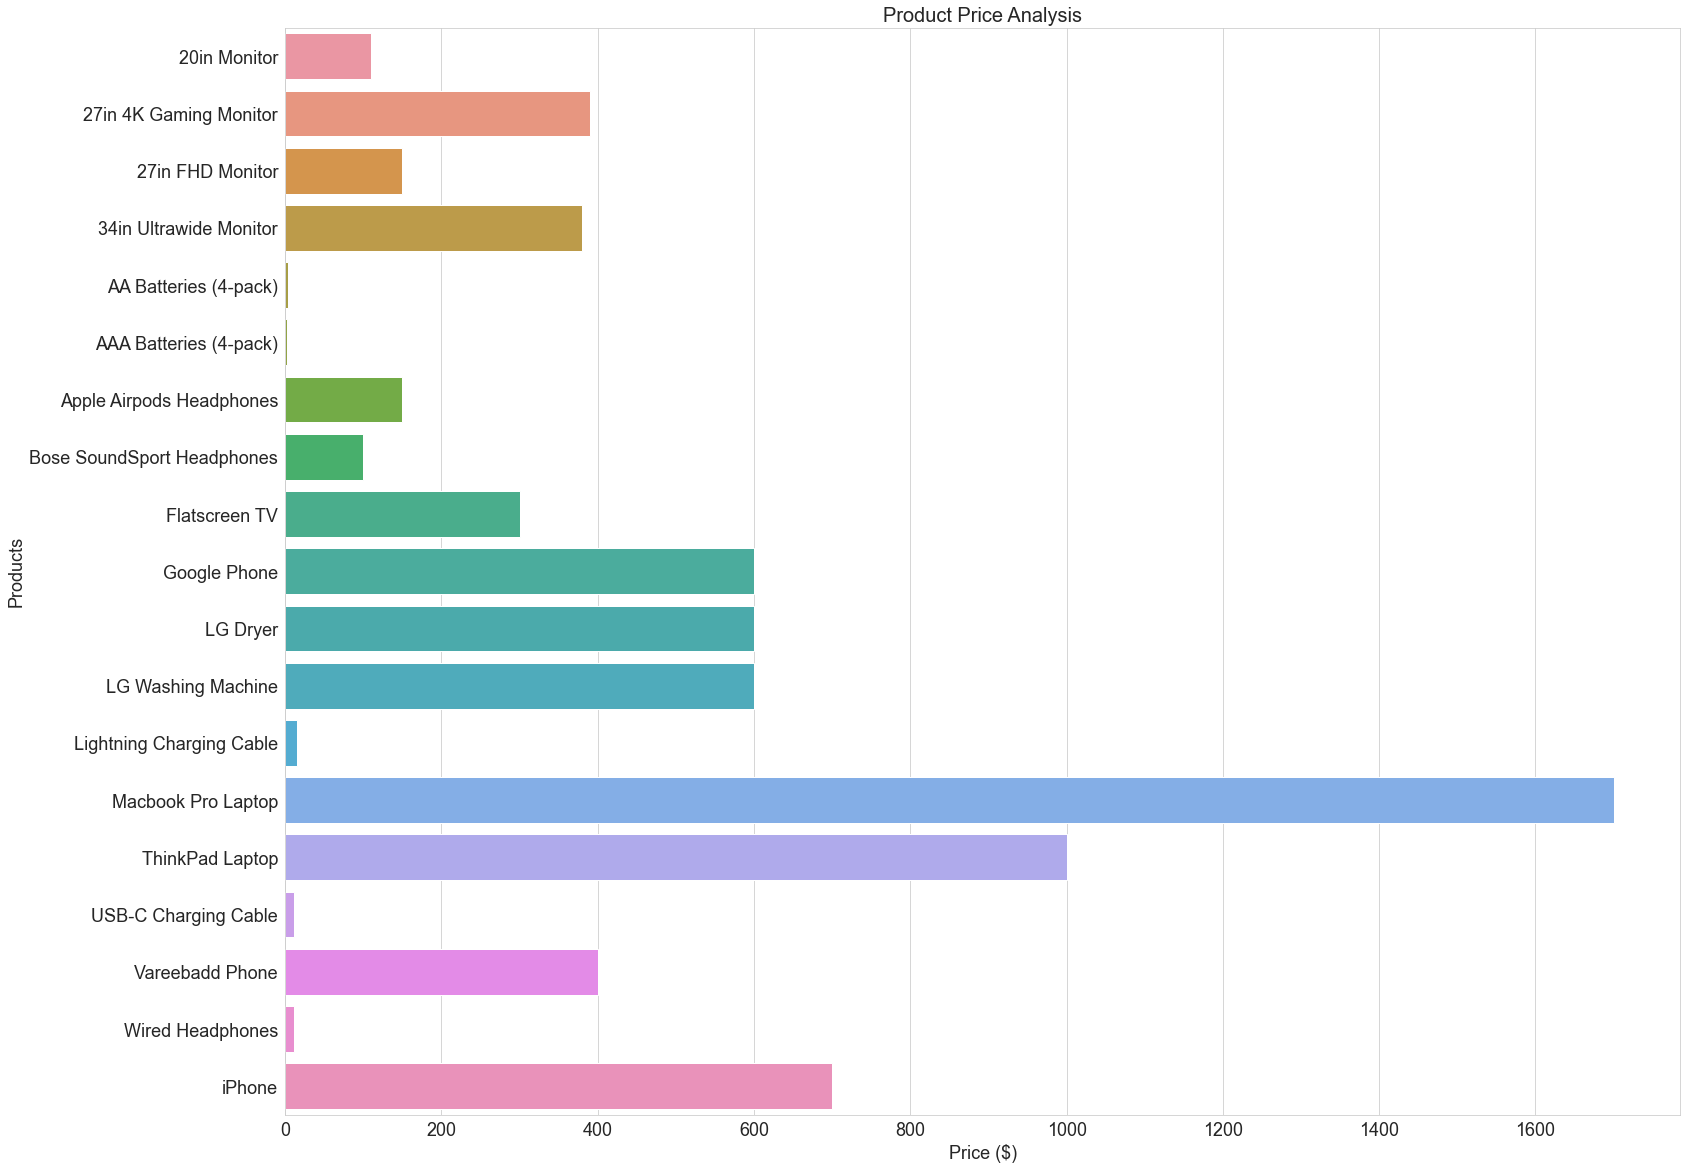

In [35]:
# Analysing the product price through barplot

plt.figure(figsize=(25,20))

sns.barplot(y="Product", x="Price Each", data=product_price, orient='h')

plt.title("Product Price Analysis", fontsize=20)
plt.xlabel("Price ($)", fontsize=18)
plt.ylabel("Products", fontsize=18)
plt.tick_params(axis='both', labelsize=18)



### Are Prices Same across all the cities?

In [36]:
city_product_price = data[["City-State","Product","Price Each"]]
city_product_price = city_product_price.drop_duplicates()

# Creating a pivot table to analyse city wise prices of each product
city_product_price = city_product_price.pivot(index="Product",columns="City-State",values="Price Each")
city_product_price

City-State,Atlanta-GA,Austin-TX,Boston-MA,Dallas-TX,Los Angeles-CA,New York City-NY,Portland-ME,Portland-OR,San Francisco-CA,Seattle-WA
Product,,,,,,,,,,
20in Monitor,109.99,109.99,109.99,109.99,109.99,109.99,109.99,109.99,109.99,109.99
27in 4K Gaming Monitor,389.99,389.99,389.99,389.99,389.99,389.99,389.99,389.99,389.99,389.99
27in FHD Monitor,149.99,149.99,149.99,149.99,149.99,149.99,149.99,149.99,149.99,149.99
34in Ultrawide Monitor,379.99,379.99,379.99,379.99,379.99,379.99,379.99,379.99,379.99,379.99
AA Batteries (4-pack),3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84,3.84
AAA Batteries (4-pack),2.99,2.99,2.99,2.99,2.99,2.99,2.99,2.99,2.99,2.99
Apple Airpods Headphones,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00
Bose SoundSport Headphones,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99
Flatscreen TV,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00


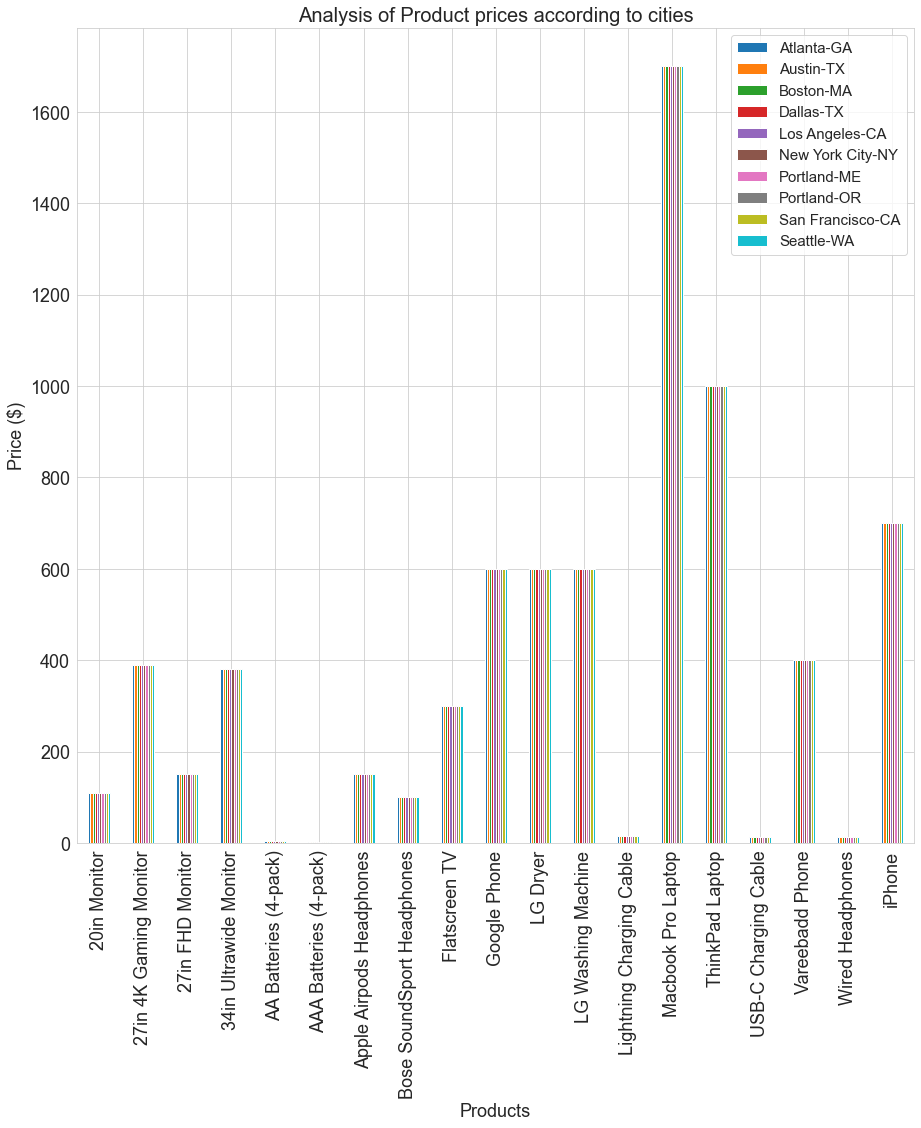

In [37]:
# Plotting the pivot table
city_product_price.plot(kind='bar',figsize=(15,15),
                        fontsize=18);
plt.ylabel("Price ($)", fontsize=18)
plt.xlabel("Products", fontsize=18)
plt.title('Analysis of Product prices according to cities', fontsize=20)
plt.legend(fontsize=15)

### Q. Which time of the day should the advertisement be displayed in order to attain the maximum likelihood of customers buying the products? Which products were most often sold together?

In [38]:
# Since now we know that the sales are maximum from december so we will analyse the December month for advertisement

# Exctracting Data for December month
dec = data[data["Month Name"]=='December']
dec.reset_index(drop=True, inplace=True)

In [39]:
# Creating hour column in the dec dataset
dec["Hour"] = pd.DatetimeIndex(dec["Order Date"]).hour

<ipython-input-39-e5a355d91dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec["Hour"] = pd.DatetimeIndex(dec["Order Date"]).hour


In [40]:
# Calculating hourly revenue
dec_rev = dec.groupby(by="Hour")["Revenue"].sum()

# Creating dataframe out of a series
dec_rev=pd.DataFrame(dec_rev)
dec_rev.reset_index(inplace=True)

# Making time column in 24 hour basis
dec_rev["Hour"]=dec_rev["Hour"]+1
dec_rev


,Hour,Revenue
0,1,93795.21
1,2,63311.56
2,3,32250.44
3,4,16567.74
4,5,19626.14
5,6,33728.66
6,7,54690.49
7,8,120218.92
8,9,168953.52
9,10,217493.38


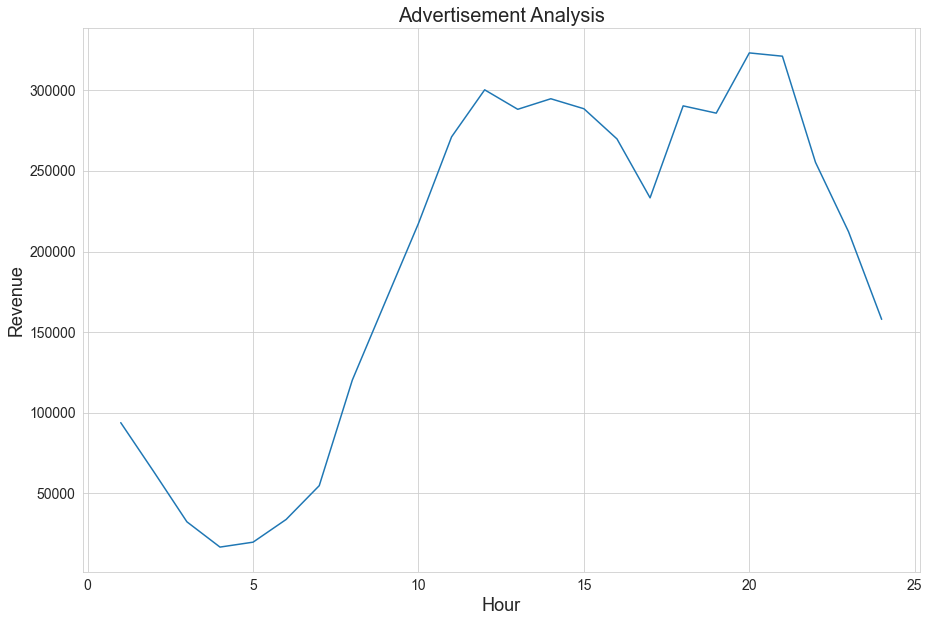

In [41]:
plt.figure(figsize=(15,10))

sns.lineplot(y="Revenue", x="Hour", data=dec_rev)

plt.title("Advertisement Analysis", fontsize=20)
plt.xlabel("Hour", fontsize=18)
plt.ylabel("Revenue", fontsize=18)
plt.tick_params(axis='both', labelsize=14)


### Q Plot the frequency of sales of each product.

In [42]:
product_frequency = data.groupby(by="Product")["Quantity Ordered"].sum()
product_frequency = pd.DataFrame(product_frequency)
product_frequency = product_frequency["Quantity Ordered"].sort_values()
product_frequency

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int32

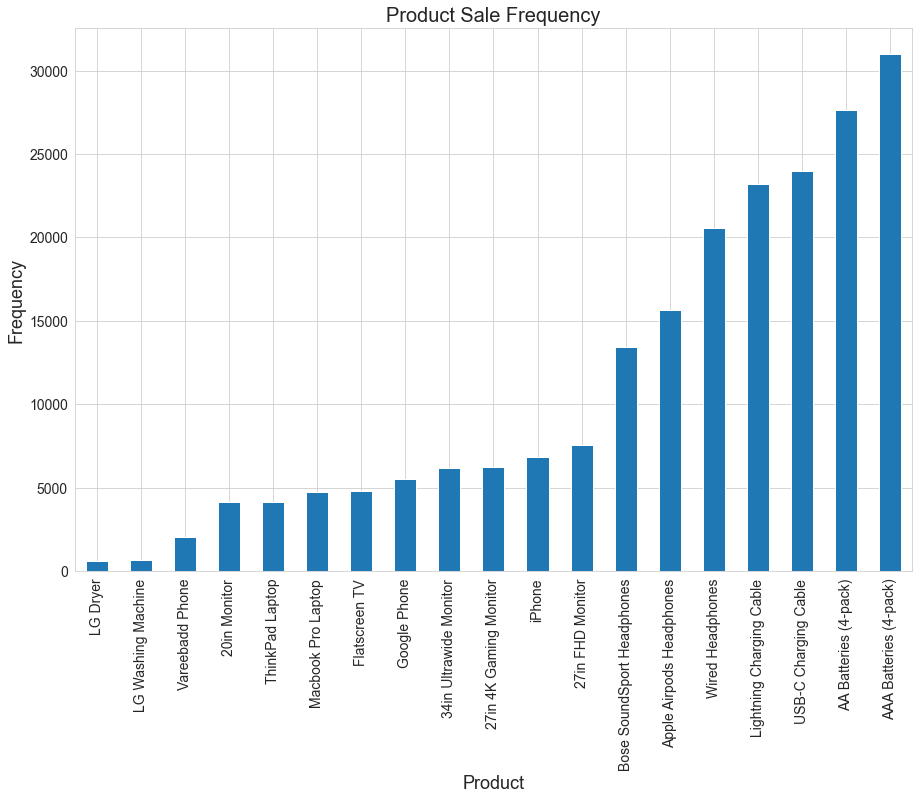

In [43]:
product_frequency.plot(kind='bar',figsize=(15,10))

plt.title("Product Sale Frequency", fontsize=20)
plt.xlabel("Product", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.tick_params(axis='both', labelsize=14)

### Q Which products were most often sold together?

In [44]:
# Creating a duplicate dataframe to store values 
order_dup = data[data.duplicated(subset = 'Order ID', keep = False)]
order_dup.shape 

(14649, 11)

In [45]:
# Creating new column in the duplicate dataframe
order_dup["Grouped"] = order_dup.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

<ipython-input-45-5f7a5338dbb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_dup["Grouped"] = order_dup.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


In [46]:
# dropping duplicate rows
order_data = order_dup.drop_duplicates(subset = 'Order ID', keep = 'first')[['Order ID', 'Grouped']]

In [47]:
# Counting rows with repeated values
products_sold_together = pd.DataFrame(order_data["Grouped"].value_counts())
products_sold_together.reset_index(inplace = True) 

In [48]:
# Creating variable to store more than 50 times a combination is sold together
product_combinations = products_sold_together[products_sold_together["Grouped"]>=50]

In [49]:
product_combinations

,index,Grouped
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
5,"iPhone, Apple Airpods Headphones",286
6,"Google Phone, Bose SoundSport Headphones",161
7,"Vareebadd Phone, Wired Headphones",104
8,"Google Phone, USB-C Charging Cable, Wired Head...",77
9,"Vareebadd Phone, Bose SoundSport Headphones",60


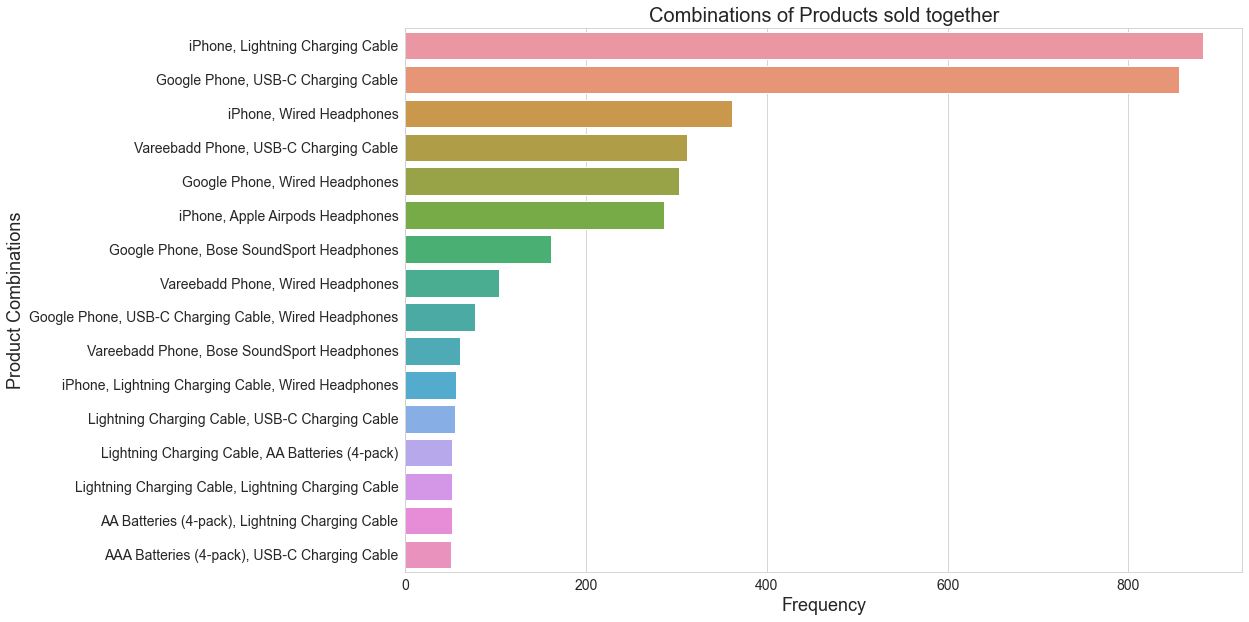

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(y='index', x='Grouped', data=product_combinations, orient='h')

plt.title("Combinations of Products sold together", fontsize=20)
plt.ylabel("Product Combinations", fontsize=18)
plt.xlabel("Frequency", fontsize=18)
plt.tick_params(axis='both', labelsize=14)